<a href="https://colab.research.google.com/github/lsantiago/PythonIntermedio/blob/master/Clases/Semana5_MATPLOTLIB/matplotlib_pandas_apuntes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/lsantiago/PythonIntermedio/blob/master/Clases/Semana5_MATPLOTLIB/img/logo2.webp?raw=1">

Es una biblioteca de trazado muy poderosa. Veamos primero cómo se estructura una gráfica en general y el vocabulario asociado con sus elementos. 

Más detalles sobre los conceptos básicos de matplotlib los encuentra en la [guía de uso](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py)

Los [tutoriales](https://matplotlib.org/tutorials/index.html) y [ejemplos](https://matplotlib.org/gallery/index.html) páginas son también vale la pena mirar..

<img src="https://github.com/lsantiago/PythonIntermedio/blob/master/Clases/Semana5_MATPLOTLIB/img/matplotlib_structure.png?raw=1">
<img src="https://github.com/lsantiago/PythonIntermedio/blob/master/Clases/Semana5_MATPLOTLIB/img/anatomy.png?raw=1">


## Lineas

Comencemos con un ejemplo simple. Queremos echar un vistazo a las series de tiempo de los datos de temperatura en un diagrama lineal simple:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

# Descarga de datos (formato raw) desde pastebin
#_ = !wget -O frankfurt_weather.csv https://pastebin.com/raw/GnLS1WR8

# Lectura de datos desde archivo
data = pd.read_csv('frankfurt_weather.csv', parse_dates=['time'], index_col='time', sep=',', na_values='')

In [3]:
data.head()

,visibility,air_temperature,dewpoint,wind_direction,wind_speed,air_pressure,cloud_height,cloud_cover
time,,,,,,,,
2015-01-01 00:20:00,2800,1.0,1.0,0.0,0.0,1036.0,200.0,OVC
2015-01-01 00:50:00,1500,1.0,1.0,0.0,0.0,1036.0,100.0,OVC
2015-01-01 01:20:00,1000,1.0,1.0,0.0,0.0,1036.0,100.0,OVC
2015-01-01 01:50:00,700,1.0,1.0,0.0,0.0,1036.0,NaN,NaN
2015-01-01 02:20:00,600,1.0,1.0,0.0,0.0,1036.0,NaN,NaN


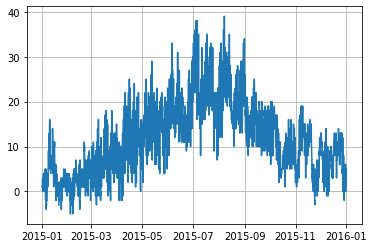

In [5]:
plt.plot(data.air_temperature)
plt.grid(True)
plt.show()

Esto nos da un pequeño gráfico lineal agradable con la serie temporal de temperatura representada como una línea azul. Sin embargo, la trama es un poco pequeña, los ejes no están etiquetados y no hay leyenda. Vamos a arreglar eso ...

In [6]:
["2015-{:02d}-15".format(x) for x in range(1,13,1)]

['2015-01-15',
 '2015-02-15',
 '2015-03-15',
 '2015-04-15',
 '2015-05-15',
 '2015-06-15',
 '2015-07-15',
 '2015-08-15',
 '2015-09-15',
 '2015-10-15',
 '2015-11-15',
 '2015-12-15']

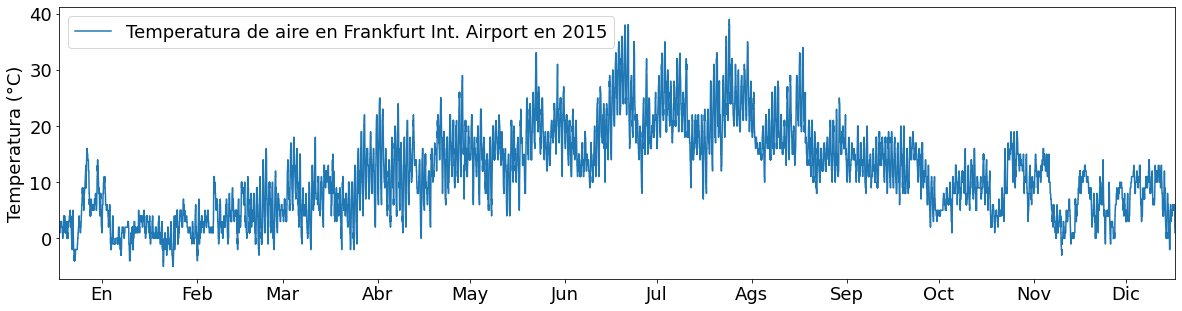

In [9]:
plt.rcParams['font.size'] = 18
plt.figure(figsize=(20,5))
plt.plot(data.air_temperature, label='Temperatura de aire en Frankfurt Int. Airport en 2015')
plt.xlim(('2015-01-01', '2015-12-31'))

# Cada 15 de cada mes se reemplaza con los meses del año
plt.xticks(["2015-{:02d}-15".format(x) for x in range(1,13,1)], ["En", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ags", "Sep", "Oct", "Nov", "Dic"])
plt.legend()
plt.ylabel("Temperatura (°C)")
plt.show()

Esto se ve mejor. Podemos ver que no tenemos que preocuparnos por los detalles de axes y axis del gráfico, ya que pyplot se encarga de ello. Cada vez que hacemos una función pyplot, solo reutiliza axes en la primera llamada de plot.

Sin embargo, digamos que no estamos interesados en las fluctuaciones diarias de temperatura.

Además, aunque construir manualmente las etiquetas xticks funciona bien, es un poco molesto. Especialmente porque el índice del dataframe de datos (que se usa para el eje x) ya contiene toda la información que necesitamos y solo el formato es incorrecto. Afortunadamente, matplotlib tiene algunas funciones de conveniencia disponibles en su submódulo de fecha que podemos usar si cambiamos al enfoque de "ejes manuales".

Así que volvamos a muestrear los datos a los medios diarios, formatee las fechas y vuelva a trazarlos

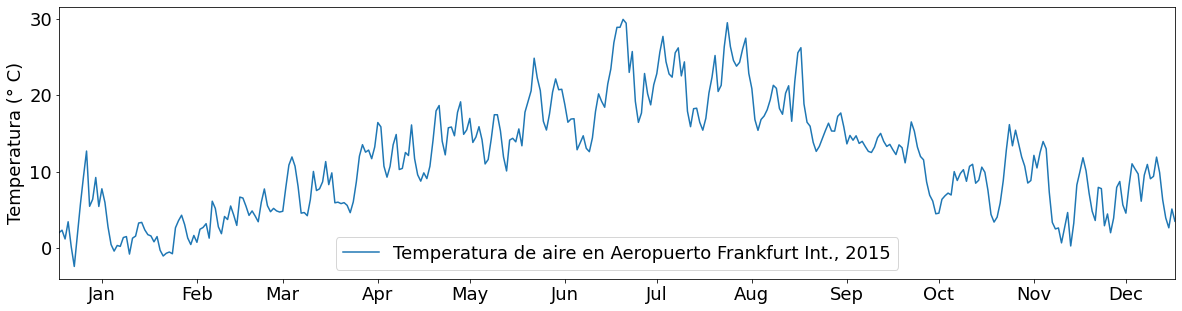

In [12]:
import matplotlib.dates as mdates # necesitamos esto para formatear la fecha correctamente

temp_resampled = data.air_temperature.resample('1d').mean()

# Asignamos la figura a una variable para poder manipularla posteriormente
fig = plt.figure(figsize=(20,5))

# Agregar nuevos ejes al dataframe manualmente.
# El argumento de la función add_subplot se usa para posicionar el diagrama
# Los primeros dos números son el número de filas / columnas en la figura
# El tercer número es la posición de la trama para crear
ax = fig.add_subplot(111)

# Graficar los datos
ax.plot(temp_resampled,label="Temperatura de aire en Aeropuerto Frankfurt Int., 2015")

# Trazar la leyenda
ax.legend ()

# Establecer la etiqueta del eje Y
ax.set_ylabel ("Temperatura (° C)")

# Establecer los límites (rango) del eje X
ax.set_xlim (("2015-01-01", "2015-12-31"))

# en lugar de crear las etiquetas de mes manualmente (como lo hicimos antes) usamos los localizadores y formateadores de fechas incorporados de matplotlib
# configure el localizador para encontrar el día 15 de cada mes (aunque no todos los meses tienen la misma duración, esto es lo suficientemente cercano)
days = mdates.DayLocator(bymonthday = 15)
# establece el formato de fecha en el nombre abreviado del mes
# Ref: https://matplotlib.org/3.1.0/api/dates_api.html
# Ref: # Ref: http://docs.safe.com/fme/2017.0/html/FME_Desktop_Documentation/FME_Transformers_HelpPane/Transformers/dateformatter.htm
monthFmt = mdates.DateFormatter("%b")

# aplicar localizador y formateador 
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(monthFmt)



También puede poner varias líneas en un `plot`:

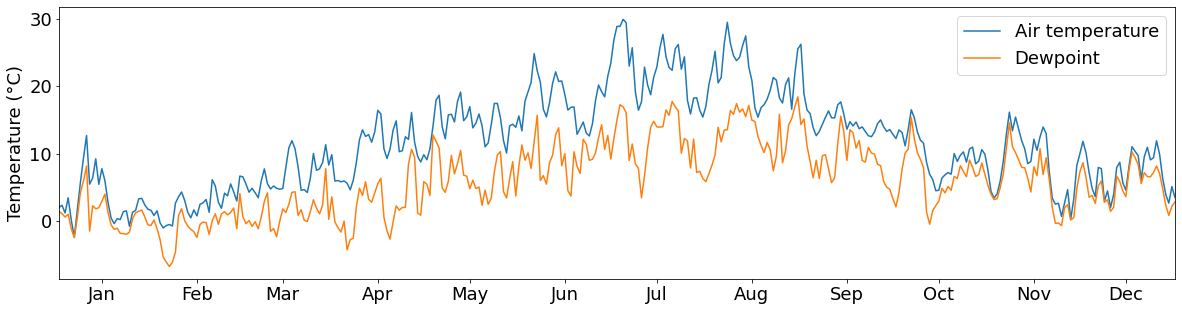

In [13]:
data_resampled = data.loc[:, ["air_temperature", "dewpoint"]].resample("1d").mean()

fig = plt.figure(figsize=(20,5))

ax = fig.add_subplot(111)

ax.plot(data_resampled.loc[:, "air_temperature"],label="Air temperature")


ax.plot(data_resampled.loc[:, "dewpoint"],label="Dewpoint")

ax.legend()
ax.set_ylabel("Temperature (°C)")
ax.set_xlim(("2015-01-01","2015-12-31"))

ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(monthFmt)

plt.show()

Y si no nos gustan los colores o los tipos de línea, podemos elegir diferentes proporcionando los argumentos `c` y `linestyle` a la función de trazado (`plot`):

In [14]:
ax.plot?

Signature: ax.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y, 

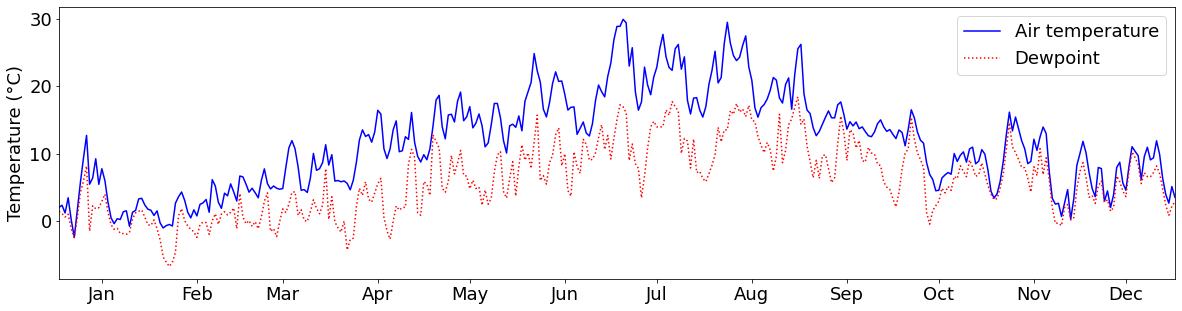

In [17]:
fig = plt.figure(figsize=(20,5))
plt.rcParams["font.size"] = 18

ax = fig.add_subplot(111)

# Ref. https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html
ax.plot(data_resampled.loc[:, "air_temperature"], label="Air temperature", c="b", linestyle="-")
ax.plot(data_resampled.loc[:, "dewpoint"], label="Dewpoint", c="r", linestyle=":")

ax.legend()
ax.set_ylabel("Temperature (°C)")
ax.set_xlim(("2015-01-01","2015-12-31"))

ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(monthFmt)

plt.show()

¿Qué sucede si queremos trazar 2 variables en el mismo diagrama que tienen unidades diferentes, por ejemplo, valores de temperatura y presión de aire?

Para esto, podemos usar la función twinx(). Crea una segunda subtrama que comparte el eje Y con la primera subtrama:

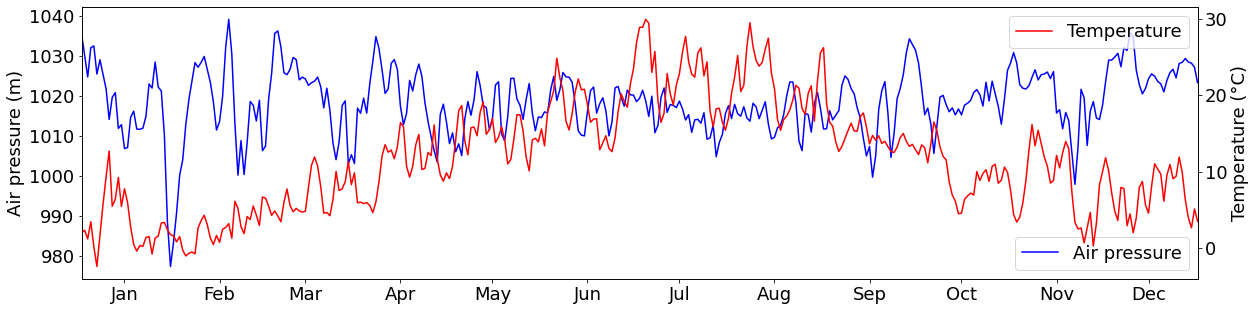

In [18]:
data_resampled = data.loc[:, ["air_temperature", "air_pressure"]].resample("1d").mean()

fig = plt.figure(figsize=(20,5))

ax2 = fig.add_subplot(111)
ax1 = ax2.twinx()

ax1.plot(data_resampled.loc[:, "air_temperature"], c="r", label="Temperature")
ax2.plot(data_resampled.loc[:, "air_pressure"], c="b", label="Air pressure")

ax1.set_ylabel("Temperature (°C)")
ax2.set_ylabel("Air pressure (m)")

ax1.legend()
ax2.legend()

ax1.set_xlim(("2015-01-01","2015-12-31"))

ax1.xaxis.set_major_locator(days)
ax1.xaxis.set_major_formatter(monthFmt)
plt.show()

Normalmente, los subplots se usan, sin embargo, para trazar varias figuras una al lado de la otra. Por ejemplo, podemos crear 2 subplots "ax1" y "ax2", que representan la temperatura y la velocidad del viento una al lado de la otra:

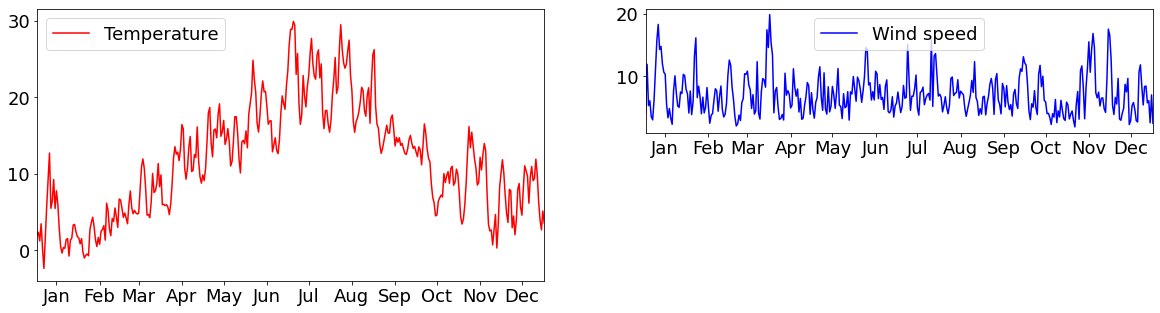

In [35]:
data_resampled = data.loc[:, ["air_temperature", "wind_speed"]].resample("1d").mean()

fig = plt.figure(figsize=(20,5))
plt.rcParams["font.size"] = 18

ax1 = fig.add_subplot(1,2,1) # add a subplot at index 1 into a plot that has 1 row and 2 columns
ax2 = fig.add_subplot(2,2,2) # add a subplot at index 2 into a plot that has 1 row and 2 columns

ax1.plot(data_resampled.loc[:, "air_temperature"], c="r", label="Temperature")
ax2.plot(data_resampled.loc[:, "wind_speed"], c="b", label="Wind speed")

ax1.legend()
ax2.legend()

ax1.set_xlim(("2015-01-01","2015-12-31"))
ax2.set_xlim(("2015-01-01","2015-12-31"))

ax1.xaxis.set_major_locator(days)
ax1.xaxis.set_major_formatter(monthFmt)

ax2.xaxis.set_major_locator(days)
ax2.xaxis.set_major_formatter(monthFmt)

plt.show()

In [27]:
pd.__version__

'1.1.4'

In [31]:
!pip show pandas

Name: pandas

El sistema no puede encontrar la ruta especificada.



Version: 1.1.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: c:\python37-64\lib\site-packages
Requires: python-dateutil, pytz, numpy
Required-by: xarray, supy, seaborn, pvlib


In [32]:
!pip show numpy

Name: numpy

El sistema no puede encontrar la ruta especificada.



Version: 1.19.2
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: None
License: BSD
Location: c:\python37-64\lib\site-packages
Requires: 
Required-by: xarray, tables, supy-driver, seaborn, scipy, pvlib, pandas, numexpr, netCDF4, matplotlib, lmfit, cftime, atmosp


In [33]:
!pip show matplotlib

Name: matplotlib

El sistema no puede encontrar la ruta especificada.



Version: 3.3.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: c:\python37-64\lib\site-packages
Requires: pyparsing, numpy, kiwisolver, certifi, pillow, python-dateutil, cycler
Required-by: supy, seaborn


In [ ]:
matplotlib 3.3.2
pandas: 1.1.3
numpy: 1.19.2

In [ ]:
!pip install matplotlib==3.3.2
!pip install pandas==1.1.3
!pip install numpy=1.19.2

Si desea guardar su figura, simplemente puede llamar a la función savefig() en lugar de show():

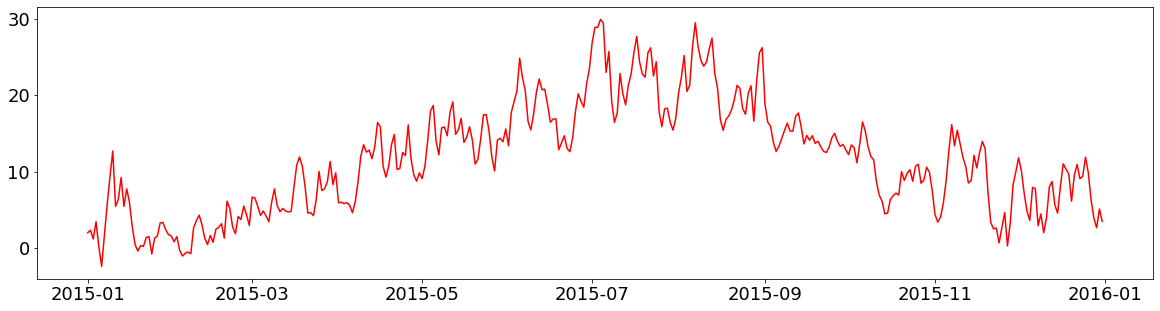

In [36]:
fig = plt.figure(figsize=(20,5))

plt.plot(data.air_temperature.resample("1d").mean(), c="r", label="Temperature")

plt.savefig("./img/beispiel_output.png")

### Histogramas

Para obtener una visión general de la distribución de los valores de temperatura, también podemos trazar un histograma de los datos:

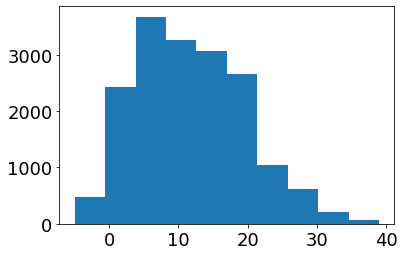

In [37]:
plt.hist(data.air_temperature.dropna())
plt.show()

Una vez más, esta trama es agradable y simple, pero podemos hacerlo mejor ...

In [39]:
temperatur = data.air_temperature.dropna()

In [40]:
temperatur.unique()

array([ 1.,  2.,  3.,  0.,  4.,  5., -1., -2., -3., -4.,  6.,  7.,  8.,
        9., 10., 11., 12., 13., 14., 15., 16., -5., 17., 18., 19., 20.,
       21., 22., 23., 24., 25., 26., 28., 29., 27., 30., 31., 32., 33.,
       34., 35., 36., 37., 38., 39.])

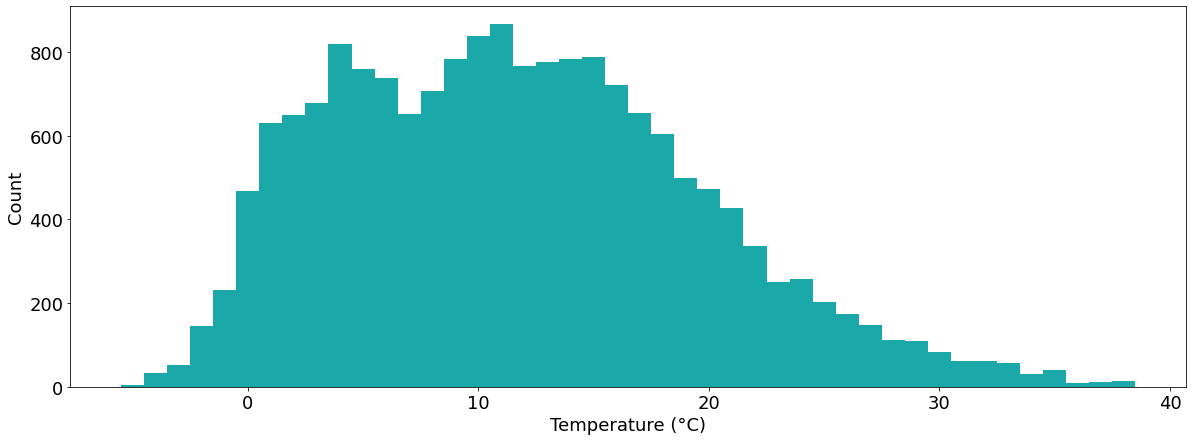

In [41]:
temperatur = data.air_temperature.dropna()

plt.figure(figsize=(20,7))

#Ref. https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.hist.html
plt.hist(temperatur,bins=sorted(temperatur.unique()-0.5), color="#1aa8a8")
plt.xlabel("Temperature (°C)")
plt.ylabel("Count")
plt.show()

También podemos trazar varios histogramas dentro de un gráfico, por ejemplo, los valores de temperatura separados en enero y agosto:

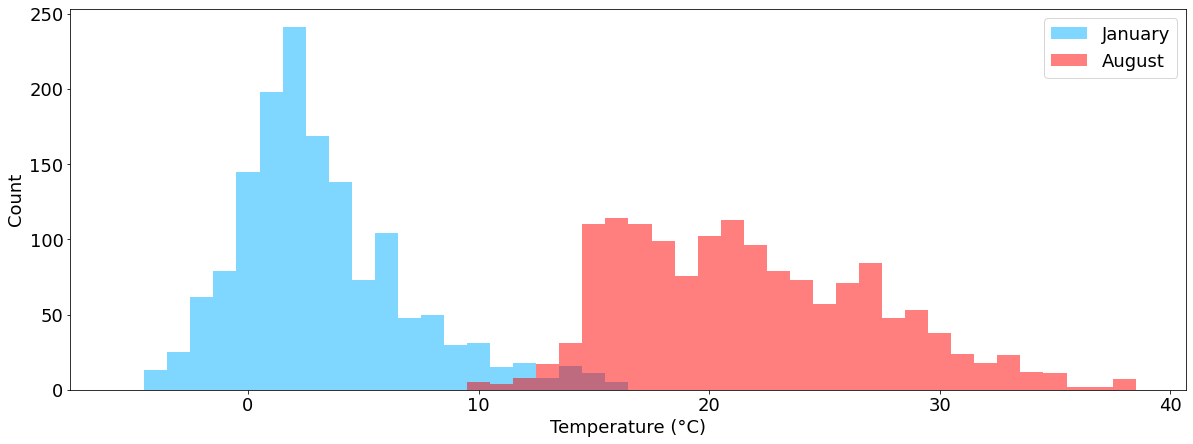

In [42]:
temperatur_jan = data.air_temperature["2015-01"].dropna()
temperatur_aug = data.air_temperature["2015-08"].dropna()

plt.figure(figsize=(20,7))

# bins, ancho del contenedor
# Ref: https://stackoverflow.com/questions/33458566/how-to-choose-bins-in-matplotlib-histogram/33459231
plt.hist(temperatur_jan,bins=sorted(data.air_temperature.dropna().unique()-0.5), color="#00b1ff", alpha=0.5, label="January")
plt.hist(temperatur_aug,bins=sorted(data.air_temperature.dropna().unique()-0.5), color="#ff0000", alpha=0.5, label="August")
plt.xlabel("Temperature (°C)")
plt.ylabel("Count")
plt.legend()
plt.show()

### Gráfico de dispersión

Otra trama de uso frecuente es el diagrama de dispersión.

Usémoslo para trazar los valores de temperatura frente a la presión de aire:

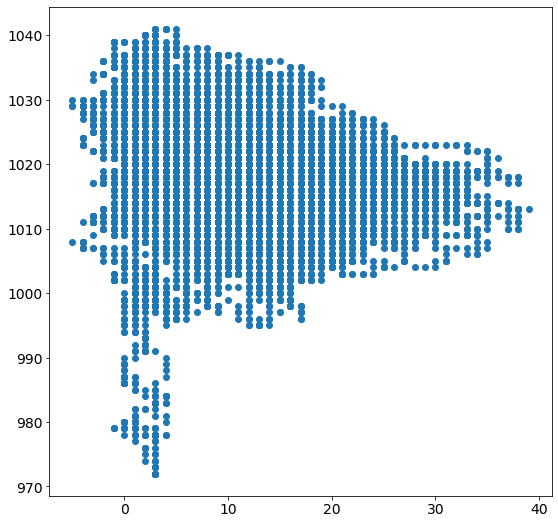

In [43]:
plt.figure(figsize=(9,9))
plt.rcParams["font.size"] = 14

plt.scatter(data.air_temperature, data.air_pressure)
plt.show()

También podemos trazar múltiples diagramas de dispersión uno encima del otro para representar más información dentro de un mismo diagrama.

Si hacemos esto con las mediciones de temperatura / presión por separado para enero y agosto, podemos ver que las presiones de aire por debajo de 1000 hPa solo prevalecieron durante enero pero no durante agosto y que el rango de valores de presión de aire fue mucho mayor durante enero que durante agosto:

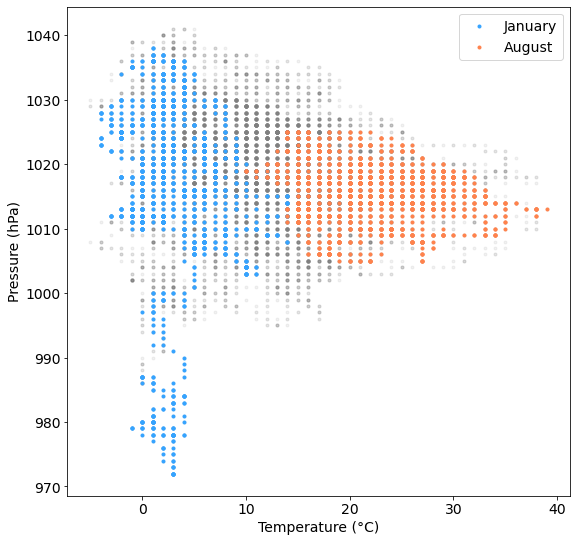

In [45]:
plt.figure(figsize=(9,9))

plt.scatter(data.air_temperature, data.air_pressure, marker=".", c="grey", alpha=0.1, label="")
plt.scatter(data.air_temperature["2015-01"], data.air_pressure["2015-01"], marker=".", c="#35A3FF", alpha=1, label="January")
plt.scatter(data.air_temperature["2015-08"], data.air_pressure["2015-08"], marker=".", c="#FF824C", alpha=1, label="August")

plt.xlabel("Temperature (°C)")
plt.ylabel("Pressure (hPa)")

plt.legend()
plt.show()

Hay muchas más opciones que puede ajustar para obtener un aspecto agradable listo para imprimir la trama. Y, por supuesto, hay muchos más tipos de gráficos (por ejemplo, gráficos de barras, gráficos de cajas, gráficos 3D, ...) No los cubriremos todos aquí, pero puede consultar la documentación de [matplotlib](https://matplotlib.org/contents.html) .

Además, hay muchas más bibliotecas de trazado que cubren todo tipo de rutinas de trazado útiles, por ejemplo, para trazar datos de viento ...

### Windroses (Rosa de vientos)

Con la extensión windrose , puede trazar fácilmente los datos del viento en un gráfico típico de rosa de los vientos:

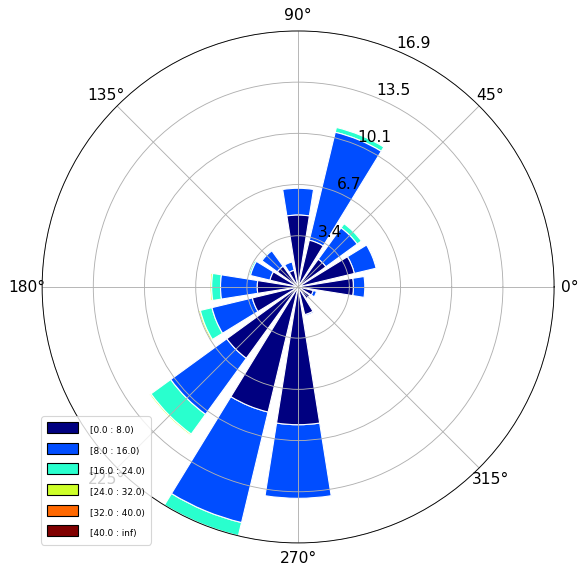

In [46]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(data.wind_direction, data.wind_speed, normed=True, opening=0.8, edgecolor="white")
ax.set_legend()
plt.show()

### Problema
Cree un diagrama lineal simple de los valores de velocidad del viento de febrero de 2015.
Cree un histograma simple de los mismos datos.



### Referencias adicionales
- https://towardsdatascience.com/data-visualization-with-python-8bc988e44f22
- https://towardsdatascience.com/advanced-plots-in-matplotlib-part-2-e88f91ce9e31